In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
import re
import string

In [3]:
from nltk import SnowballStemmer

In [4]:
from nltk.tokenize import MWETokenizer

In [5]:
from cleantext import clean

In [6]:
import emoji

In [7]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import Normalizer
from sklearn import metrics

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
df = pd.read_csv("Tweet.csv")

In [10]:
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [11]:
from sklearn import preprocessing

In [12]:
label_encoder = preprocessing.LabelEncoder()
df['airline_sentiment']= label_encoder.fit_transform(df['airline_sentiment'])

In [13]:
df1 = df[(df.airline_sentiment == 0) | (df.airline_sentiment == 2)]

In [14]:
df1['text'] = df1['text'].str.replace("<br />","")
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
df1.text = df1.text.map(lambda x : re.sub(r'http?://\S+' ,' ', x))
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower()) 
df1['text'] = df1.text.map(alphanumeric).map(punc_lower)
df1

C:\Users\PC\AppData\Local\Temp\ipykernel_15028\4070103810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['text'] = df1['text'].str.replace("<br />","")
C:\Users\PC\AppData\Local\Temp\ipykernel_15028\4070103810.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.text = df1.text.map(lambda x : re.sub(r'http?://\S+' ,' ', x))
C:\Users\PC\AppData\Local\Temp\ipykernel_15028\4070103810.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
1,570301130888122368,2,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,virginamerica plus you ve added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
3,570301031407624196,0,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,virginamerica it s really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,0,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,virginamerica and it s a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,0,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,virginamerica seriously would pay a flight...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,2,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,virginamerica yes nearly every time i fly vx...,NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14633,569587705937600512,0,1.0000,Cancelled Flight,1.0000,American,NaN,RussellsWriting,NaN,0,americanair my flight was cancelled flightled...,NaN,2015-02-22 12:01:06 -0800,Los Angeles,Arizona
14634,569587691626622976,0,0.6684,Late Flight,0.6684,American,NaN,GolfWithWoody,NaN,0,americanair right on cue with the delays👌,NaN,2015-02-22 12:01:02 -0800,NaN,Quito
14635,569587686496825344,2,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,americanair thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,0,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,americanair leaving over minutes late fligh...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN


In [15]:
df1

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
1,570301130888122368,2,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,virginamerica plus you ve added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
3,570301031407624196,0,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,virginamerica it s really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,0,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,virginamerica and it s a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,0,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,virginamerica seriously would pay a flight...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,2,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,virginamerica yes nearly every time i fly vx...,NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14633,569587705937600512,0,1.0000,Cancelled Flight,1.0000,American,NaN,RussellsWriting,NaN,0,americanair my flight was cancelled flightled...,NaN,2015-02-22 12:01:06 -0800,Los Angeles,Arizona
14634,569587691626622976,0,0.6684,Late Flight,0.6684,American,NaN,GolfWithWoody,NaN,0,americanair right on cue with the delays👌,NaN,2015-02-22 12:01:02 -0800,NaN,Quito
14635,569587686496825344,2,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,americanair thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,0,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,americanair leaving over minutes late fligh...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN


In [16]:
df1.drop(["user_timezone", "tweet_location", "tweet_coord" ], axis=1, inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_15028\2155652190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(["user_timezone", "tweet_location", "tweet_coord" ], axis=1, inplace=True)


In [17]:
df1

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_created
1,570301130888122368,2,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,virginamerica plus you ve added commercials t...,2015-02-24 11:15:59 -0800
3,570301031407624196,0,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,virginamerica it s really aggressive to blast...,2015-02-24 11:15:36 -0800
4,570300817074462722,0,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,virginamerica and it s a really big bad thing...,2015-02-24 11:14:45 -0800
5,570300767074181121,0,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,virginamerica seriously would pay a flight...,2015-02-24 11:14:33 -0800
6,570300616901320704,2,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,virginamerica yes nearly every time i fly vx...,2015-02-24 11:13:57 -0800
...,...,...,...,...,...,...,...,...,...,...,...,...
14633,569587705937600512,0,1.0000,Cancelled Flight,1.0000,American,NaN,RussellsWriting,NaN,0,americanair my flight was cancelled flightled...,2015-02-22 12:01:06 -0800
14634,569587691626622976,0,0.6684,Late Flight,0.6684,American,NaN,GolfWithWoody,NaN,0,americanair right on cue with the delays👌,2015-02-22 12:01:02 -0800
14635,569587686496825344,2,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,americanair thank you we got on a different f...,2015-02-22 12:01:01 -0800
14636,569587371693355008,0,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,americanair leaving over minutes late fligh...,2015-02-22 11:59:46 -0800


In [18]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
        u"\U0001f600-\U0001f64f"  # emoticons
        u"\U0001f300-\U0001f5ff"  # symbols & pictographs
        u"\U0001f680-\U0001f6ff"  # transport & map symbols
        u"\U0001f1e0-\U0001f1ff"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# replace emojis in column 'text'
df1['text'] = df1['text'].apply(remove_emoji)

C:\Users\PC\AppData\Local\Temp\ipykernel_15028\1755884383.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['text'] = df1['text'].apply(remove_emoji)


In [19]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
        u"\U0001f600-\U0001f64f"  # emoticons
        u"\U0001f300-\U0001f5ff"  # symbols & pictographs
        u"\U0001f680-\U0001f6ff"  # transport & map symbols
        u"\U0001f1e0-\U0001f1ff"  # flags (iOS)
        u"\u2764"  # specific heart emoji
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

df1['text'] = df1['text'].apply(remove_emoji)


C:\Users\PC\AppData\Local\Temp\ipykernel_15028\2530828968.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['text'] = df1['text'].apply(remove_emoji)


In [20]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
        u"\U0001f600-\U0001f64f"  # emoticons
        u"\U0001f300-\U0001f5ff"  # symbols & pictographs
        u"\U0001f680-\U0001f6ff"  # transport & map symbols
        u"\U0001f1e0-\U0001f1ff"  # flags (iOS)
        u"\u263A"  # specific heart emoji
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

df1['text'] = df1['text'].apply(remove_emoji)


C:\Users\PC\AppData\Local\Temp\ipykernel_15028\1791400524.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['text'] = df1['text'].apply(remove_emoji)


In [21]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
        u"\U0001f600-\U0001f64f"  # emoticons
        u"\U0001f300-\U0001f5ff"  # symbols & pictographs
        u"\U0001f680-\U0001f6ff"  # transport & map symbols
        u"\U0001f1e0-\U0001f1ff"  # flags (iOS)
        u"\u2708"  # specific heart emoji
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

df1['text'] = df1['text'].apply(remove_emoji)


C:\Users\PC\AppData\Local\Temp\ipykernel_15028\2185356148.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['text'] = df1['text'].apply(remove_emoji)


In [22]:
df1.text.values[:50]

array([' virginamerica plus you ve added commercials to the experience    tacky ',
       ' virginamerica it s really aggressive to blast obnoxious  entertainment  in your guests  faces  amp  they have little recourse',
       ' virginamerica and it s a really big bad thing about it',
       ' virginamerica seriously would pay    a flight for seats that didn t have this playing \nit s really the only bad thing about flying va',
       ' virginamerica yes  nearly every time i fly vx this “ear worm” won’t go away   ',
       ' virginamerica well  i didn t…but now i do    d',
       ' virginamerica it was amazing  and arrived an hour early  you re too good to me ',
       ' virginamerica i  lt   pretty graphics  so much better than minimal iconography   d',
       ' virginamerica this is such a great deal  already thinking about my   trip to  australia  amp  i haven t even gone on my   trip yet   p',
       ' virginamerica  virginmedia i m flying your  fabulous  seductive skies again  u t

In [23]:
daily_abbreviations = {"laughing out loud":["lol"],
                 "as soon as possible":["asap"],
                 "for your information":["fyi"],
                 "got to go":["g2g"],
                 "facebook":["fb"],
                 "message":["msg"],
                 "talk to you later":["ttyl"],
                 "in my opinion":["imo"],
                 "direct message":["dm"],
                 "retweet":["rt"],
                 "ask me anything":["ama"],
                 "thank":["thx","thanx"],
                 "please":["pls","plz"],
                 "missing in action":["mia"],
                 "hour":["hrs"],
                 "by the way":["btw"],
                 "becuase":["b/c","bc"],
                 "are":["r"],
                 "you":["u"],
                 "your":["yr"],
                 "you are":["ur"],
                 "trying not to laugh":["tntl"],
                 "i don't care":["idc"],
                 "to be honest":["tbh"],
                 "tweet me back":["twb"],
                 "please text back":["ptb"],
                 "please retweet":["prt"],
                 "wait":["w8"],
                 "away from keyboard":["afk"],
                 #aylar
                 "january":["jan"],
                       "february":["feb"],
                 "march":["mar"],
                 "april":["apr"],
                 "june":["jun"],
                 "july":["jul"],
                 "august":["aug"],
                 "september":["sep","sept"],
                 "october":["oct"],
                 "november":["nov"],
                 "december":["dec"],
                 #günler
                 "monday":["mon"],
                 "tuesday":["tue","tues"],
                 "wednesday":["wed"],
                 "thursday":["thu","th","thur","thurs"],
                 "friday":["fri"],
                 "saturday":["sat"],
                 "sunday":["sun"]}
flight_abbreviations = {"john f kennedy international airport":["jfk"],
                        "los angeles international airport":["lax"],
                        "o hare international airport":["ord"],
                        "laguardia airport":["lga"],
                        "san francisco international airport":["sfo"],
                        "orlando international airport":["mco"],
                        "logan international airport":["bos"],
                        "fort lauderdale hollywood international airport":["fll"],
                        "newark liberty international airport":["ewr"],
                        "washington dulles international airport":["iad"],
                        "dallas love field airport":["dal"],
                        "dallas fort worth international airport":["dfw"],
                        "seattle tacoma international airport":["sea"],
                        "portland international airport":["pdx"],
                        "toronto pearson international airport":["yyz"],
                        "charles de gaulle airport":["cdg"],
                        "london heathrow airport":["lhr"],
                        "hong kong international airport":["hkg"],
                        "narita international airport":["nrt"],
                        "austin bergstrom international airport":["atx"],                        
                        "sydney airport":["syd"],
                        "san fransisco":["sf"],
                        "los angeles":["la"],
                        "new york city":["nyc"],
                        "washington":["dca"],
                        "san jose":["sjc"],
                        "virgin america":["va"],
                        "southwest":["luv"],
                        "required navigation performance":["rnp"],
                        "england":["gb"],
                        "united states":["us","usa"]
                       }

In [24]:
for ix, text in enumerate(df1.text):
    txt = text.split(" ")
    for word in txt:
        for key, value in daily_abbreviations.items():
            if word in value:
                df1.text.iloc[ix] = df1.text.iloc[ix].replace(word," "+key+" ")
for ix, text in enumerate(df1.text):
    txt = text.split(" ")
    for word in txt:
        for key, value in flight_abbreviations.items():
            if word in value:
                df1.text.iloc[ix] = df1.text.iloc[ix].replace(word," "+key+" ")

C:\Users\PC\AppData\Local\Temp\ipykernel_15028\2442622209.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.text.iloc[ix] = df1.text.iloc[ix].replace(word," "+key+" ")
C:\Users\PC\AppData\Local\Temp\ipykernel_15028\2442622209.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.text.iloc[ix] = df1.text.iloc[ix].replace(word," "+key+" ")


In [25]:
df1.text.values[:150]

array([' virginamerica plus you ve added commercials to the experience    tacky ',
       ' virginamerica it s really aggressive to blast obnoxious  entertainment  in your guests  faces  amp  they have little recourse',
       ' virginamerica and it s a really big bad thing about it',
       ' virginamerica seriously would pay    a flight for seats that didn t have this playing \nit s really the only bad thing about flying  virgin america ',
       ' virginamerica yes  nearly every time i fly vx this “ear worm” won’t go away   ',
       ' virginamerica well  i didn t…but now i do    d',
       ' virginamerica it was amazing  and arrived an hour early  you re too good to me ',
       ' virginamerica i  lt   pretty graphics  so much better than minimal iconography   d',
       ' virginamerica this is such a great deal  already thinking about my   trip to  australia  amp  i haven t even gone on my   trip yet   p',
       ' virginamerica  virginmedia i m flying yo you r  fab you lo you s  

In [26]:
df1 = df1[(df1.airline_sentiment_confidence == 1)]

In [27]:
df1

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_created
3,570301031407624196,0,1.0,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,virginamerica it s really aggressive to blast...,2015-02-24 11:15:36 -0800
4,570300817074462722,0,1.0,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,virginamerica and it s a really big bad thing...,2015-02-24 11:14:45 -0800
5,570300767074181121,0,1.0,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,virginamerica seriously would pay a flight...,2015-02-24 11:14:33 -0800
9,570295459631263746,2,1.0,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,virginamerica it was amazing and arrived an ...,2015-02-24 10:53:27 -0800
11,570289724453216256,2,1.0,NaN,NaN,Virgin America,NaN,HyperCamiLax,NaN,0,virginamerica i lt pretty graphics so muc...,2015-02-24 10:30:40 -0800
...,...,...,...,...,...,...,...,...,...,...,...,...
14630,569588473050611712,2,1.0,NaN,NaN,American,NaN,Laurelinesblog,NaN,0,americanair thanks he is,2015-02-22 12:04:09 -0800
14631,569588464896876545,0,1.0,Bad Flight,1.0000,American,NaN,MDDavis7,NaN,0,americanair thank for nothing on getting u...,2015-02-22 12:04:07 -0800
14633,569587705937600512,0,1.0,Cancelled Flight,1.0000,American,NaN,RussellsWriting,NaN,0,americanair my flight was cancelled flightled...,2015-02-22 12:01:06 -0800
14636,569587371693355008,0,1.0,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,americanair leaving over minutes late fligh...,2015-02-22 11:59:46 -0800


In [28]:
from nltk import SnowballStemmer

sbs = SnowballStemmer(language='english')

In [29]:
X = df1.text
y = df1.airline_sentiment

In [30]:
X = df1.text
y = df1.airline_sentiment
from imblearn.under_sampling import RandomUnderSampler
X_under, y_under = RandomUnderSampler().fit_resample(pd.array(X).reshape(-1,1),y)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.3, random_state=42)
X = df1.text
y = df1.airline_sentiment
from imblearn.under_sampling import RandomUnderSampler
X_under, y_under = RandomUnderSampler().fit_resample(pd.array(X).reshape(-1,1),y)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

cv1 = CountVectorizer(stop_words='english') # Stop wordsleri kaldırma

# Train ve Test veri setlerine CountVectorizer uygulama
X_train_cv1 = cv1.fit_transform(X_train)
X_test_cv1  = cv1.transform(X_test)

pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names_out()).head()

,aa,aaaand,aaadvantage,aadelay,aadv,aadvantage,aafail,aal,aaron,aback,...,ywg,yyj,zero,zfv,zgoqoxjbqy,zip,zippers,zone,zones,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# 2'li N-Gram yöntemini kullanarak tokenize etme
cv2 = CountVectorizer(ngram_range=(1,2), binary=True, stop_words='english')

X_train_cv2 = cv2.fit_transform(X_train)
X_test_cv2  = cv2.transform(X_test)

pd.DataFrame(X_train_cv2.toarray(), columns=cv2.get_feature_names_out()).head()

,aa,aa account,aa accounts,aa agent,aa agents,aa amp,aa automated,aa becuase,aa behalf,aa botched,...,zgoqoxjbqy,zip,zippers,zippers sorry,zone,zone forced,zones,zones thanks,zurich,zurich credit
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [36]:
# Kelimelere ayırarak oluşturulan DataFrame
lr.fit(X_train_cv1, y_train)
y_pred_cv1 = lr.predict(X_test_cv1)


In [37]:
# 2'li N-Gram yöntemi kullanılarak oluşturulan DataFrame
lr.fit(X_train_cv2, y_train)
y_pred_cv2 = lr.predict(X_test_cv2)

In [38]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def conf_matrix(actual, predicted):
    plt.figure(figsize=[8,8])
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, xticklabels=['Predicted Negative', 'Predicted Positive'], 
                yticklabels=['Actual Negative', 'Actual Positive'], annot=True,
                fmt='d', annot_kws={'fontsize':35}, cmap="YlGnBu", square=True);

    accuracy = accuracy_score(actual, predicted)
    precision = precision_score(actual, predicted, pos_label= 0 , zero_division=1)
    recall = recall_score(actual, predicted, pos_label= 0 , zero_division=1)
    f1 = f1_score(actual, predicted, pos_label= 0 , zero_division=1)
    # pos_label parametresi precision, recall ve f1 score unu görmek istediğimiz labelı soruyor
    # zero_division parametresi 0'a bölme işlemini gerçekleşirse uyarı verip vermeyeceğini soruyor (1=uyarı verme)

    cm_results = [accuracy, precision, recall, f1]
    return cm_results

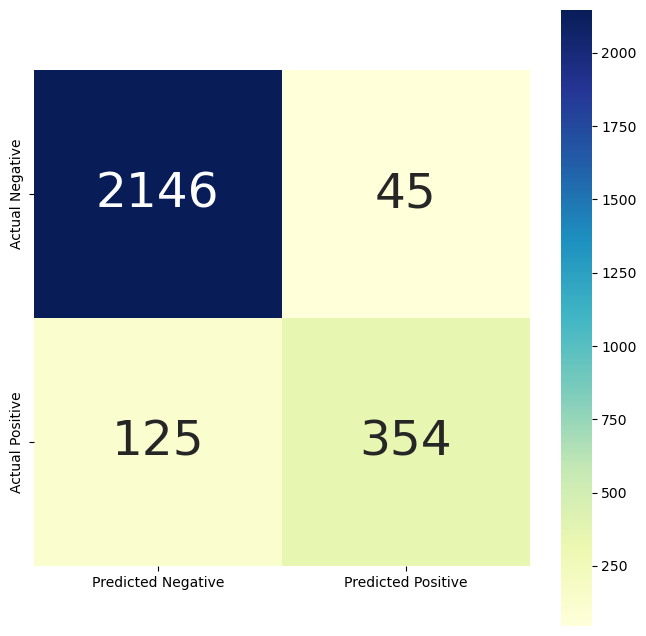

In [39]:
# İlk modelimizden elde ettiğimiz hata matrisi
cm1 = conf_matrix(y_test, y_pred_cv1)

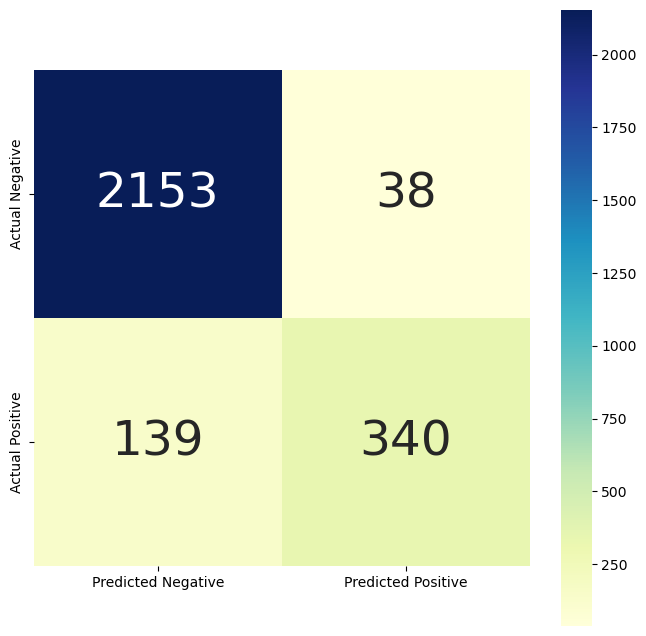

In [40]:
# İkinci modelimizden elde ettiğimiz hata matrisi
cm2 = conf_matrix(y_test, y_pred_cv2)

In [41]:
results = pd.DataFrame(list(zip(cm1, cm2)))
results = results.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results.columns = ['LR(Word)-CV', 'LR(N-Grams)-CV']
results

,LR(Word)-CV,LR(N-Grams)-CV
Accuracy,0.936330,0.933708
Precision,0.944958,0.939354
Recall,0.979461,0.982656
F1 Score,0.961900,0.960518


In [42]:
# İlk olarak MultinomialNB algoritmasıyla modellerimizi eğitelim
from sklearn.naive_bayes import MultinomialNB

mnb1 = MultinomialNB()
mnb1.fit(X_train_cv1, y_train)

mnb2 = MultinomialNB()
mnb2.fit(X_train_cv2, y_train)

y_pred_cv1_mnb = mnb1.predict(X_test_cv1)
y_pred_cv2_mnb = mnb2.predict(X_test_cv2)

In [43]:
# Ardından da BernoulliNB algoritmasıyla
from sklearn.naive_bayes import BernoulliNB

bnb1 = BernoulliNB()
bnb1.fit(X_train_cv1, y_train)

bnb2 = BernoulliNB()
bnb2.fit(X_train_cv2, y_train)

y_pred_cv1_bnb = bnb1.predict(X_test_cv1)
y_pred_cv2_bnb = bnb2.predict(X_test_cv2)

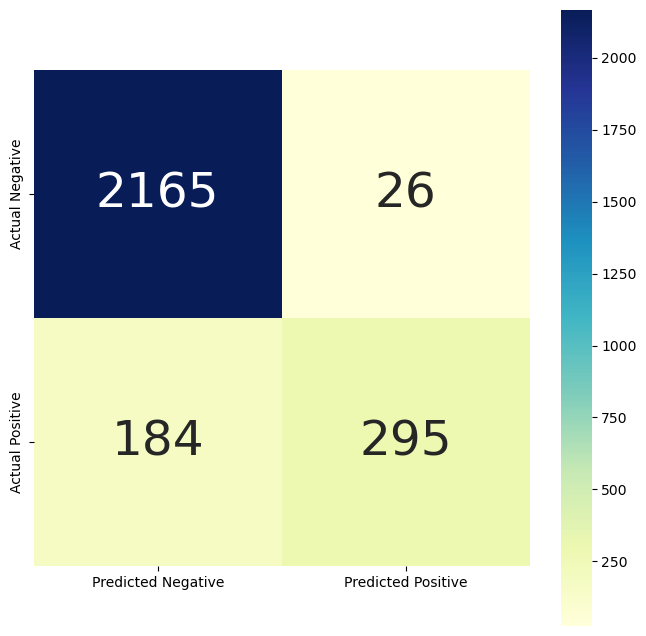

In [44]:
# MultinomialNB & Kelime
cm3 = conf_matrix(y_test, y_pred_cv1_mnb)

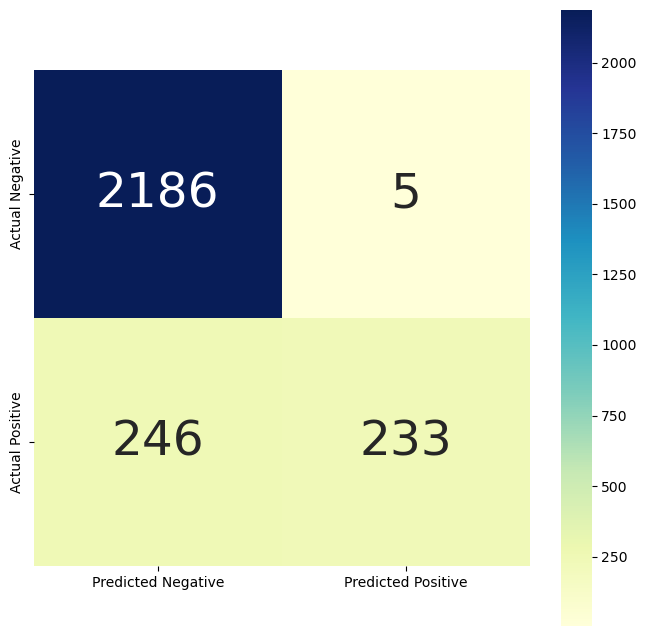

In [45]:
# MultinomialNB & 2'li N-Grams
cm4 = conf_matrix(y_test, y_pred_cv2_mnb)

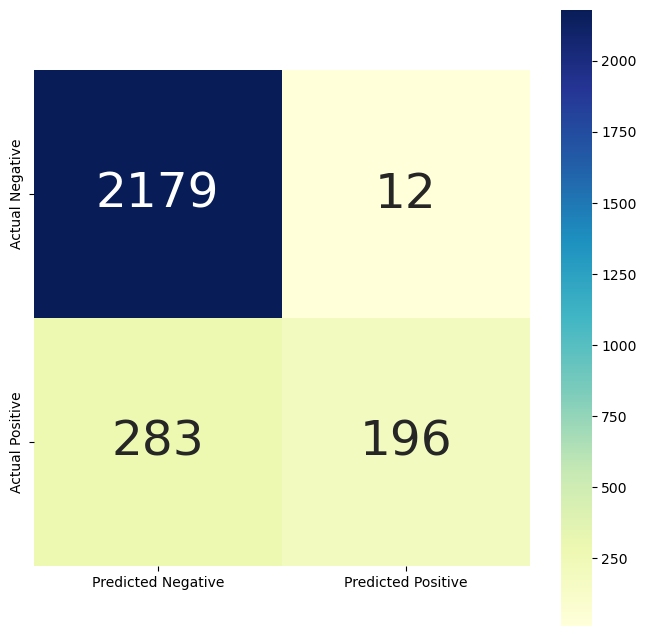

In [46]:
# BernoulliNB & Kelime
cm5 = conf_matrix(y_test, y_pred_cv1_bnb)

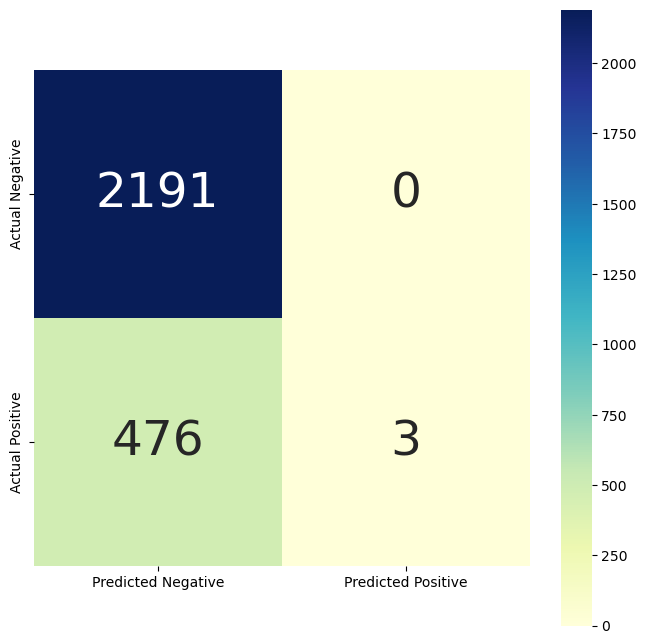

In [47]:
# BernoulliNB & 2'li N-Grams
cm6 = conf_matrix(y_test, y_pred_cv2_bnb)

In [48]:
results_nb = pd.DataFrame(list(zip(cm3, cm4, cm5, cm6)))
results_nb = results_nb.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results_nb.columns = ['MNB(Word)-CV', 'MNB(N-Grams)-CV', 'BNB(Word)-CV', 'BNB(N-Grams)-CV']
results_nb

results = pd.concat([results, results_nb], axis=1)
results

,LR(Word)-CV,LR(N-Grams)-CV,MNB(Word)-CV,MNB(N-Grams)-CV,BNB(Word)-CV,BNB(N-Grams)-CV
Accuracy,0.936330,0.933708,0.921348,0.905993,0.889513,0.821723
Precision,0.944958,0.939354,0.921669,0.898849,0.885053,0.821522
Recall,0.979461,0.982656,0.988133,0.997718,0.994523,1.000000
F1 Score,0.961900,0.960518,0.953744,0.945706,0.936600,0.902017


In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf1 = TfidfVectorizer(stop_words='english')
X_train_tfidf1 = tfidf1.fit_transform(X_train)
X_test_tfidf1  = tfidf1.transform(X_test)

tfidf2 = TfidfVectorizer(ngram_range=(1,2), binary=True, stop_words='english')
X_train_tfidf2 = tfidf2.fit_transform(X_train)
X_test_tfidf2  = tfidf2.transform(X_test)

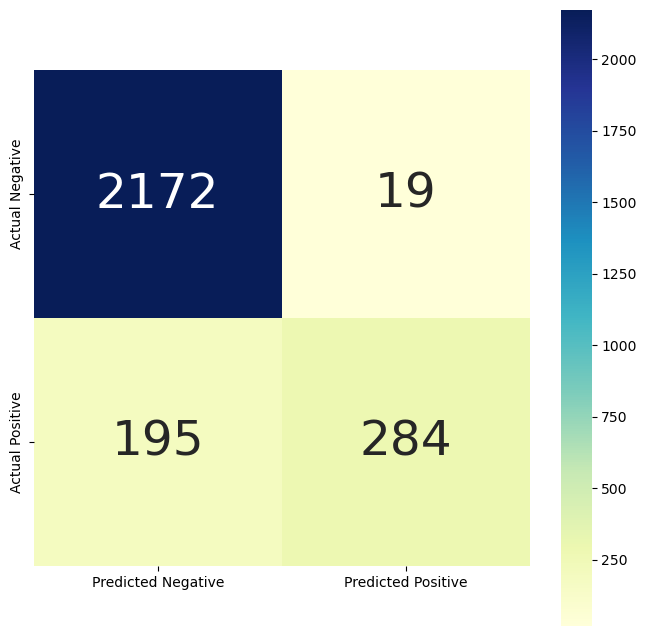

In [50]:
lr.fit(X_train_tfidf1, y_train)
y_pred_tfidf1_lr = lr.predict(X_test_tfidf1)

# Logistic Regresyon & Kelime
cm7 = conf_matrix(y_test, y_pred_tfidf1_lr)

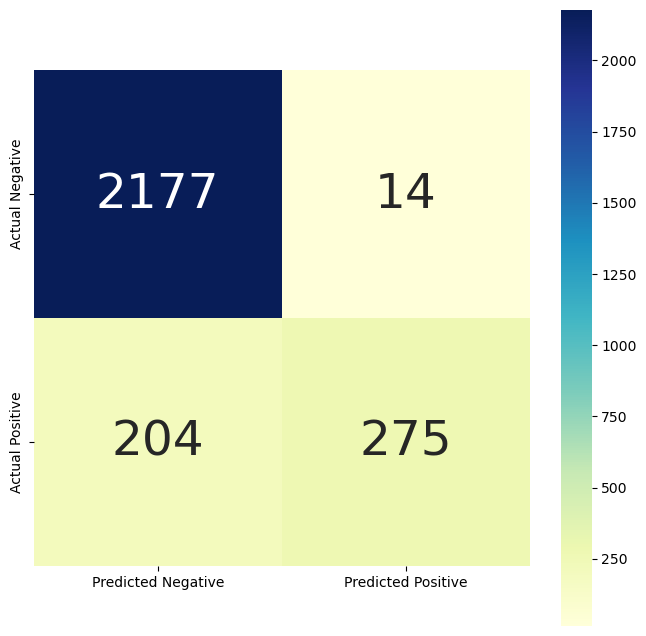

In [51]:
lr.fit(X_train_tfidf2, y_train)
y_pred_tfidf2_lr = lr.predict(X_test_tfidf2)

# Logistic Regresyon & 2'li N-Grams
cm8 = conf_matrix(y_test, y_pred_tfidf2_lr)

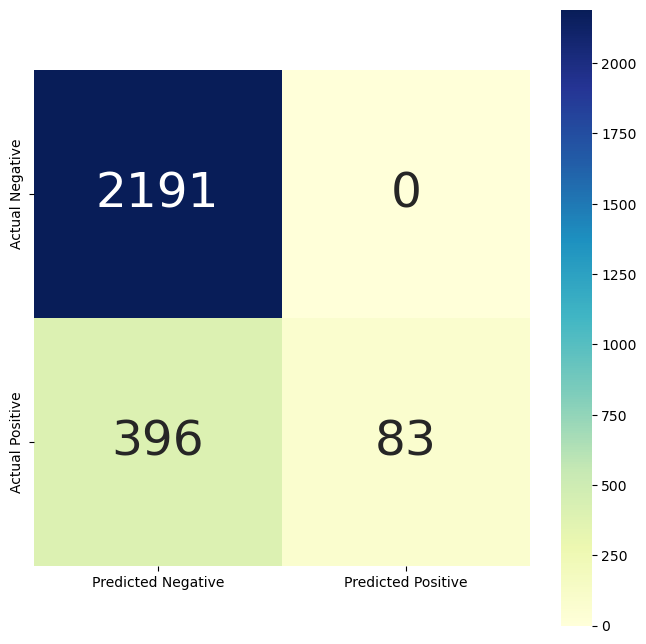

In [52]:
mnb1.fit(X_train_tfidf1.toarray(), y_train)
y_pred_tfidf1_mnb = mnb1.predict(X_test_tfidf1)

# MultinominalNB & Kelime
cm9 = conf_matrix(y_test, y_pred_tfidf1_mnb)

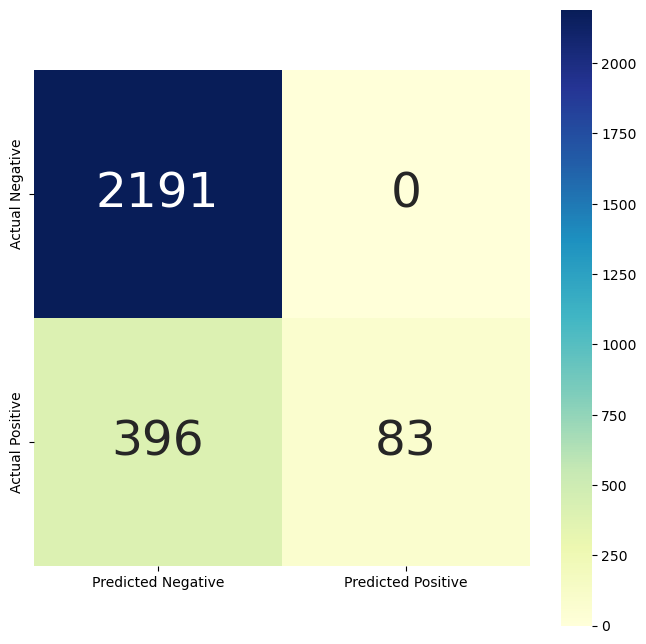

In [53]:
mnb2.fit(X_train_tfidf1.toarray(), y_train)
y_pred_tfidf2_mnb = mnb2.predict(X_test_tfidf1)

# MultinominalNB & 2'li N-Grams
cm10 = conf_matrix(y_test, y_pred_tfidf2_mnb)

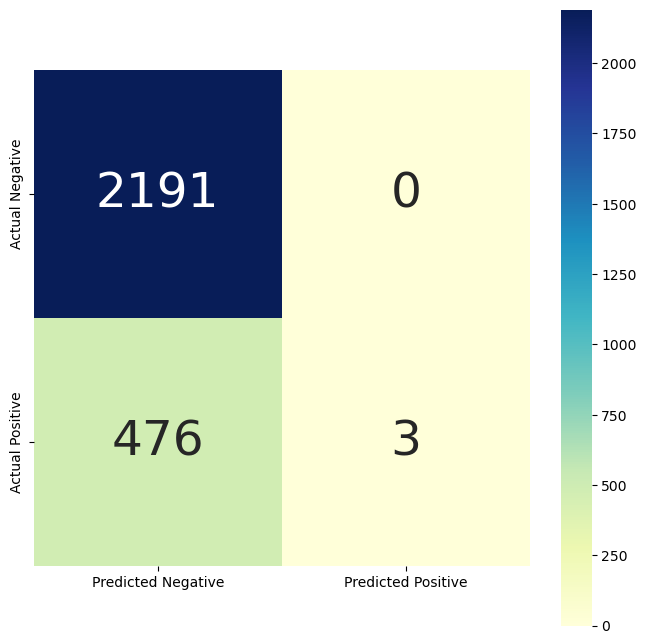

In [54]:
bnb1.fit(X_train_tfidf2.toarray(), y_train)
y_pred_tfidf1_bnb = bnb1.predict(X_test_tfidf2)

# BernoulliNB & Kelime
cm11 = conf_matrix(y_test, y_pred_tfidf1_bnb)

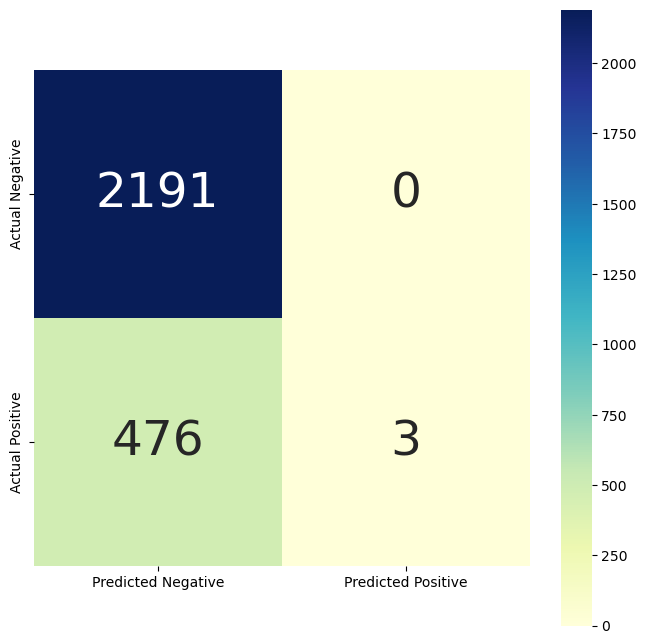

In [55]:
bnb2.fit(X_train_tfidf2.toarray(), y_train)
y_pred_tfidf2_bnb = bnb2.predict(X_test_tfidf2)

# BernoulliNB & 2'li N-Grams
cm12 = conf_matrix(y_test, y_pred_tfidf2_bnb)

In [56]:
results_tf = pd.DataFrame(list(zip(cm7, cm8, cm9, cm10, cm11, cm12)))
results_tf = results_tf.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results_tf.columns = ['LR(Word)-TFIDF', 'LR(N-Grams)-TFIDF', 'MNB(Word)-TFIDF', 
                      'MNB(N-Grams)-TFIDF', 'BNB(Word)-TFIDF', 'BNB(N-Grams)-TFIDF']
results_tf

results = pd.concat([results, results_tf], axis=1)
results

,LR(Word)-CV,LR(N-Grams)-CV,MNB(Word)-CV,MNB(N-Grams)-CV,BNB(Word)-CV,BNB(N-Grams)-CV,LR(Word)-TFIDF,LR(N-Grams)-TFIDF,MNB(Word)-TFIDF,MNB(N-Grams)-TFIDF,BNB(Word)-TFIDF,BNB(N-Grams)-TFIDF
Accuracy,0.936330,0.933708,0.921348,0.905993,0.889513,0.821723,0.919850,0.918352,0.851685,0.851685,0.821723,0.821723
Precision,0.944958,0.939354,0.921669,0.898849,0.885053,0.821522,0.917617,0.914322,0.846927,0.846927,0.821522,0.821522
Recall,0.979461,0.982656,0.988133,0.997718,0.994523,1.000000,0.991328,0.993610,1.000000,1.000000,1.000000,1.000000
F1 Score,0.961900,0.960518,0.953744,0.945706,0.936600,0.902017,0.953050,0.952318,0.917120,0.917120,0.902017,0.902017


In [61]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [59]:
from nltk.corpus import stopwords

In [62]:
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def text_process(msg):
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])
df1.text = df1.text.apply(text_process)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\PC\AppData\Local\Temp\ipykernel_15028\3923698614.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.text = df1.text.apply(text_process)


In [64]:
df1.text

3        virginamerica really aggressive blast obnoxiou...
4                       virginamerica really big bad thing
5        virginamerica seriously would pay flight seats...
9            virginamerica amazing arrived hour early good
11       virginamerica lt pretty graphics much better m...
                               ...                        
14630                                   americanair thanks
14631    americanair thank nothing getting united state...
14633    americanair flight cancelled flightled leaving...
14636    americanair leaving minutes late flight warnin...
14638    americanair money change flight answer phones ...
Name: text, Length: 8897, dtype: object

In [65]:
from collections import Counter
Counter(" ".join(df1["text"]).split()).most_common(100)

[('united', 3337),
 ('flight', 2725),
 ('americanair', 1982),
 ('usairways', 1961),
 ('southwestair', 1294),
 ('jetblue', 1129),
 ('airport', 978),
 ('get', 854),
 ('service', 824),
 ('cancelled', 818),
 ('states', 744),
 ('international', 699),
 ('thanks', 641),
 ('customer', 620),
 ('hour', 610),
 ('hours', 588),
 ('time', 581),
 ('hold', 572),
 ('help', 519),
 ('amp', 494),
 ('plane', 484),
 ('delayed', 458),
 ('thank', 445),
 ('still', 444),
 ('call', 418),
 ('flightled', 403),
 ('gate', 393),
 ('one', 387),
 ('bag', 386),
 ('flights', 381),
 ('back', 365),
 ('late', 342),
 ('phone', 336),
 ('airline', 332),
 ('please', 322),
 ('waiting', 317),
 ('yo', 313),
 ('got', 306),
 ('would', 296),
 ('need', 287),
 ('today', 279),
 ('guys', 276),
 ('wait', 269),
 ('never', 269),
 ('like', 268),
 ('delay', 262),
 ('great', 260),
 ('day', 258),
 ('virginamerica', 243),
 ('even', 241),
 ('fly', 240),
 ('trying', 240),
 ('minutes', 234),
 ('people', 233),
 ('worst', 233),
 ('really', 231),
 ('e